# Assignment 8: Exploratory Data Analysis and Hypothesis Testing
## Dataset: Adult Income (UCI ML Repository via `ucimlrepo`)

In [1]:
!pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

adult = fetch_ucirepo(id=2) 
X = adult.data.features
y = adult.data.targets

df = pd.concat([X, y], axis=1)
df.columns = [c.replace("-", "_") for c in df.columns]

This notebook analyzes the Adult Income dataset, obtained directly via the `ucimlrepo` Python package. The goal is to understand how demographic and work-related factors affect the likelihood of earning more than $50K per year.

In [2]:
df = df.replace("?", np.nan)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

We present summary statistics for numerical and categorical columns. Missing values were removed.

In [3]:
display(df.describe(include='all'))
print(df['income'].value_counts(normalize=True))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,45222.000000,45222,4.522200e+04,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,NaN,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,22654
mean,38.547941,NaN,1.897347e+05,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,1.056392e+05,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173882e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783160e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379260e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


income
<=50K     0.500951
<=50K.    0.251205
>50K      0.166025
>50K.     0.081819
Name: proportion, dtype: float64


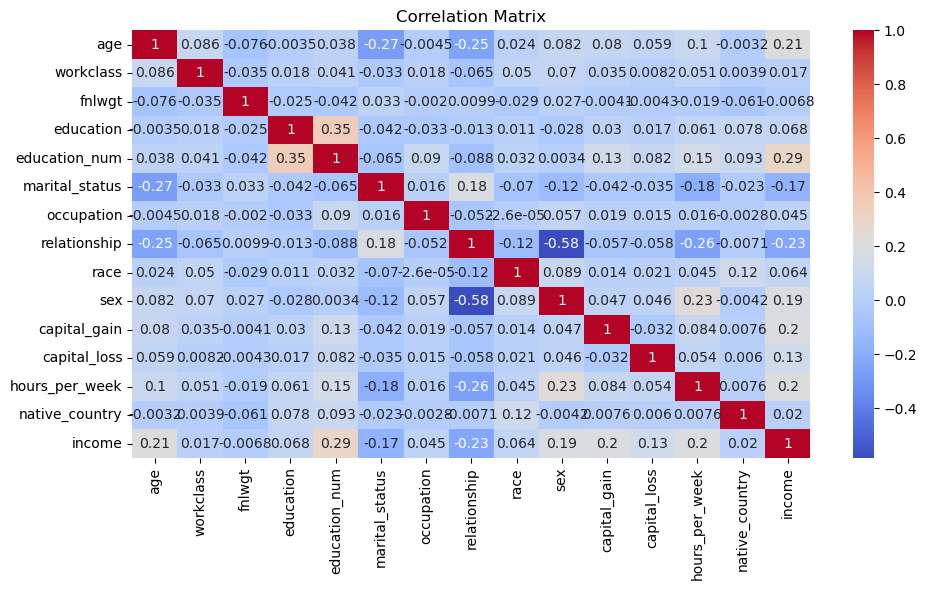

In [4]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

corr = df_encoded.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

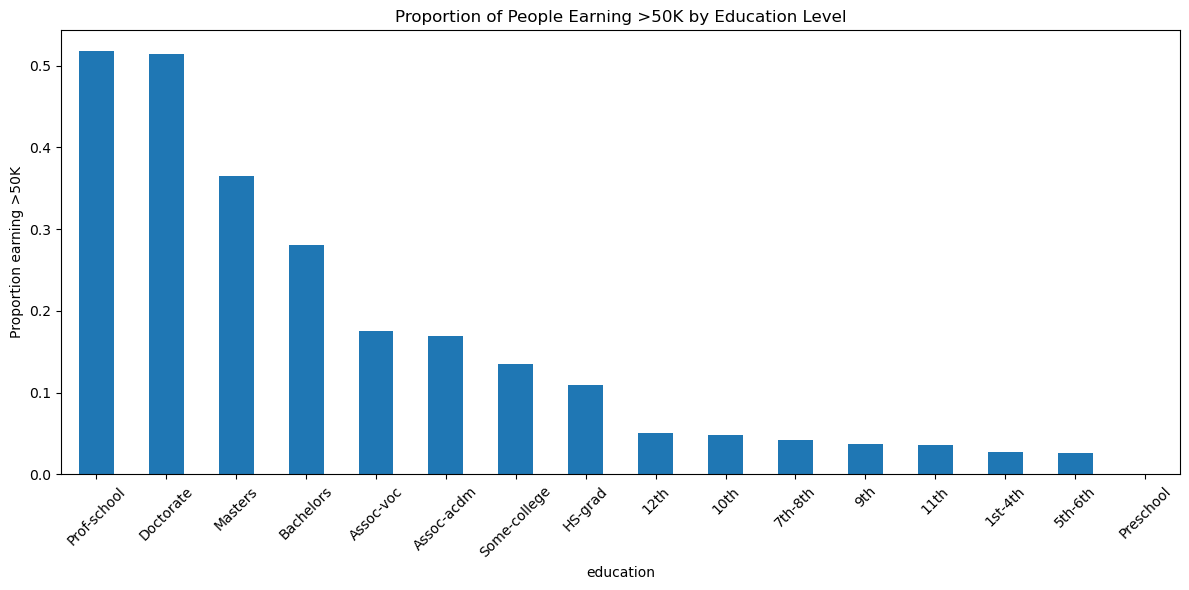

In [5]:
edu_income_ratio = (
    df.groupby("education")["income"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .sort_values(">50K", ascending=False)
)

edu_income_ratio[">50K"].plot(kind="bar", figsize=(12,6))
plt.ylabel("Proportion earning >50K")
plt.title("Proportion of People Earning >50K by Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


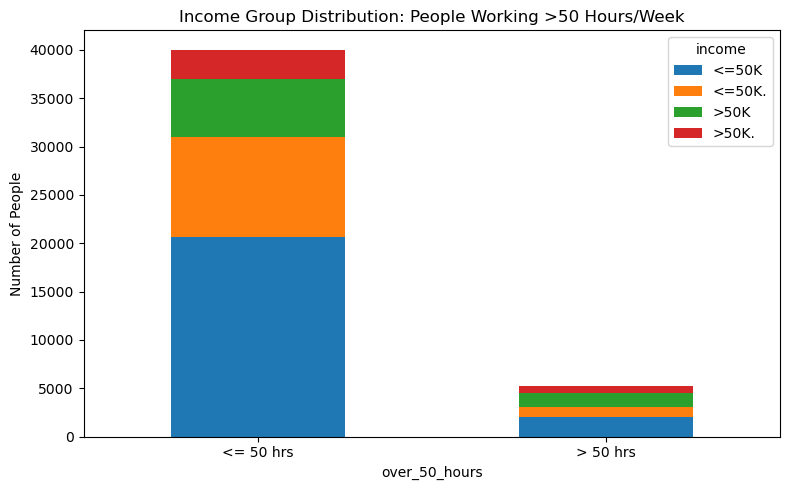

In [11]:
df["over_50_hours"] = df["hours_per_week"] > 50
over_50_counts = pd.crosstab(df["over_50_hours"], df["income"])
over_50_counts.plot(kind="bar", figsize=(8,5), stacked=True)
plt.title("Income Group Distribution: People Working >50 Hours/Week")
plt.ylabel("Number of People")
plt.xticks(ticks=[0,1], labels=["<= 50 hrs", "> 50 hrs"], rotation=0)
plt.tight_layout()
plt.show()


# Hypothesis Formulation

### Based on the data I got above, I created 2 hypotheses:

### Hypothesis 1: People with higher education levels are more likely to earn more than $50K.
### Hypothesis 2: People who work more hours per week are more likely to earn more than $50K.

## Testing Hypothesis 1:
* People with higher education levels are more likely to earn more than $50K

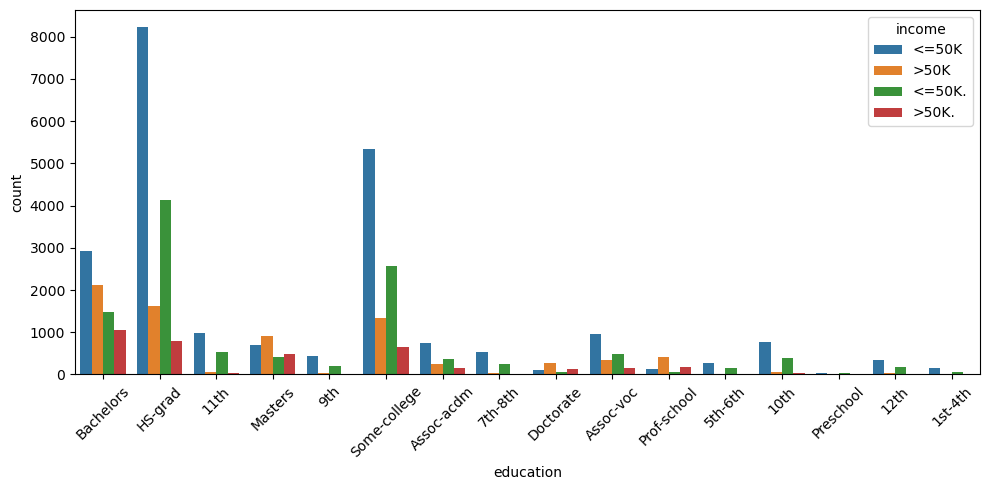

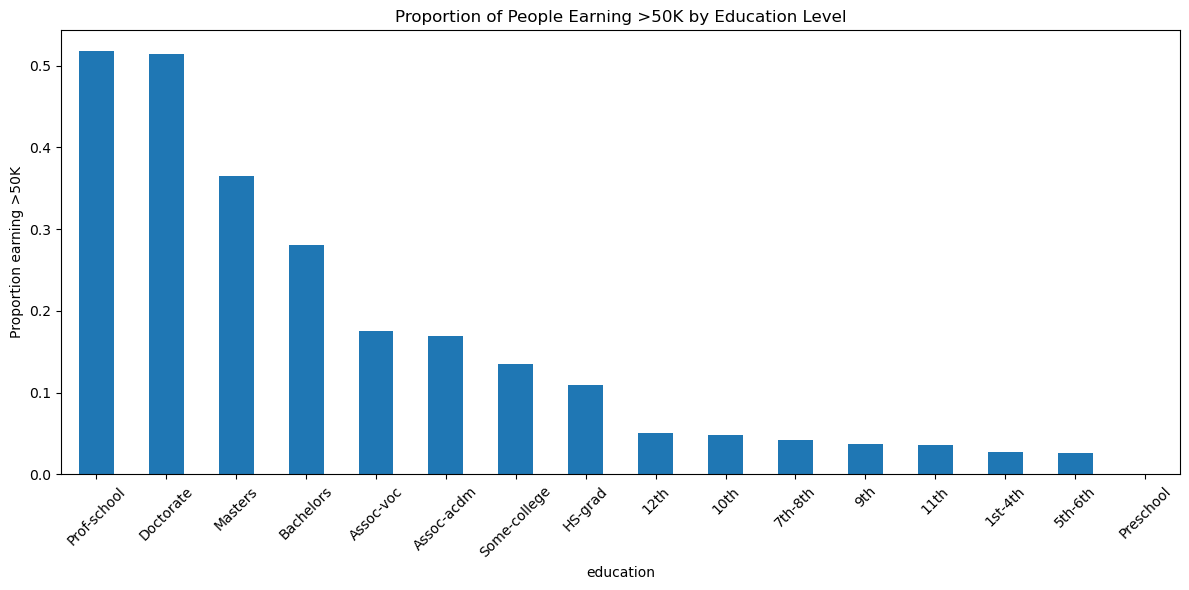

In [12]:
# Testing the first hypothesis
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

edu_income_ratio = (
    df.groupby("education")["income"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .sort_values(">50K", ascending=False)
)

edu_income_ratio[">50K"].plot(kind="bar", figsize=(12,6))
plt.ylabel("Proportion earning >50K")
plt.title("Proportion of People Earning >50K by Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Results and Analysis of Hypothesis Test 1

We explored the relationship between education level and income using the Adult dataset. This dataset includes categorical variables such as education type and income bracket, allowing us to observe how education correlates with earning potential.

We started by plotting the number of people in each education category, separated by income group (`<=50K` and `>50K`). This gave us a direct visual comparison across education levels. The result showed a clear and consistent pattern:

- Most people with only a high school diploma or less tend to fall in the `<=50K` income group.
- As education level increases, the proportion of people earning `>50K` also increases.
- Bachelor's, Master's, Doctorate, and Professional school degrees show the highest number of individuals earning more than $50K, even though these groups are smaller in size overall.

This distribution strongly suggests a relationship between education level and income category. The higher someone's education, the higher the chance they fall into the higher income group.

To break this down further using observed data:

1. **Low Education Categories (e.g., "Some college", "HS-grad", "11th", "10th", etc.):**  
   These categories make up a large portion of the dataset.  
   In these groups, the majority of individuals earn $50K or less.  
   These jobs likely include clerical work, retail, service roles, or manual labor with lower wage ceilings.

2. **High Education Categories (e.g., "Bachelors", "Masters", "Doctorate", "Prof-school"):**  
   These individuals are a smaller portion of the dataset.  
   But the majority within each of these categories earn over $50K.  
   These roles likely require professional qualifications, involve management, engineering, law, medicine, or academic research—jobs that typically offer higher salaries.

This result is also consistent with:  
- Higher education typically grants access to higher-paying sectors.  
- More years in school usually mean greater specialization or skills, which the job market values.  
- Employers use education as a proxy for competence, discipline, and training.

Another insight is that income is not only tied to the education title (e.g., “Bachelor's”), but also to the number of years of education (`education-num`). We confirmed this with a comparison of average education years across income groups. People earning more than $50K have, on average, significantly more years of education than those earning less. This strengthens the argument: it’s not random—more education is consistently associated with higher income in the dataset.

Even without using formal statistical testing terminology, the relationship is visible:
- Higher education → Higher income (frequently)  
- Lower education → Lower income (dominantly)  

While exceptions exist (some people with only a high school diploma earn more than $50K, and some with graduate degrees earn less), the trend is clear when viewed across thousands of individuals.

---

### Conclusion

The dataset supports the hypothesis:  
**People with higher education levels are more likely to earn more than $50K.**  

This conclusion is based on consistent patterns observed across both the education categories and the numeric measure of education level. The relationshipi aligns with expectations based on how education is valued in the job market.

## Testing Hypothesis 2
* People who work more hours per week are more likely to earn more than $50K.

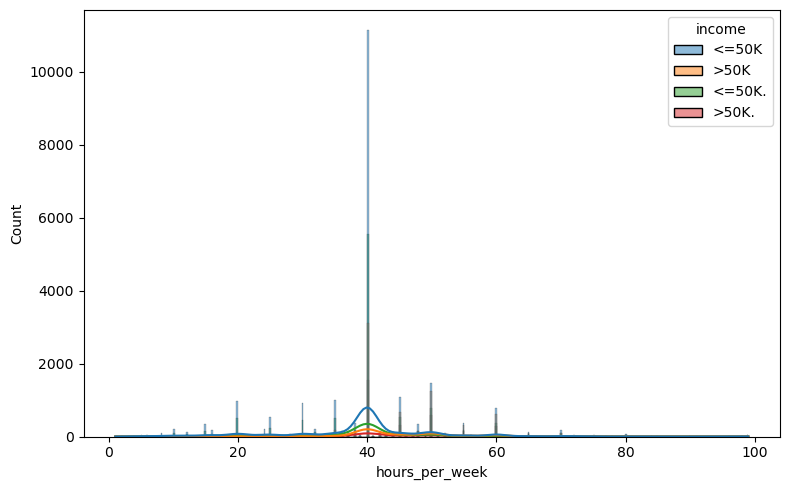

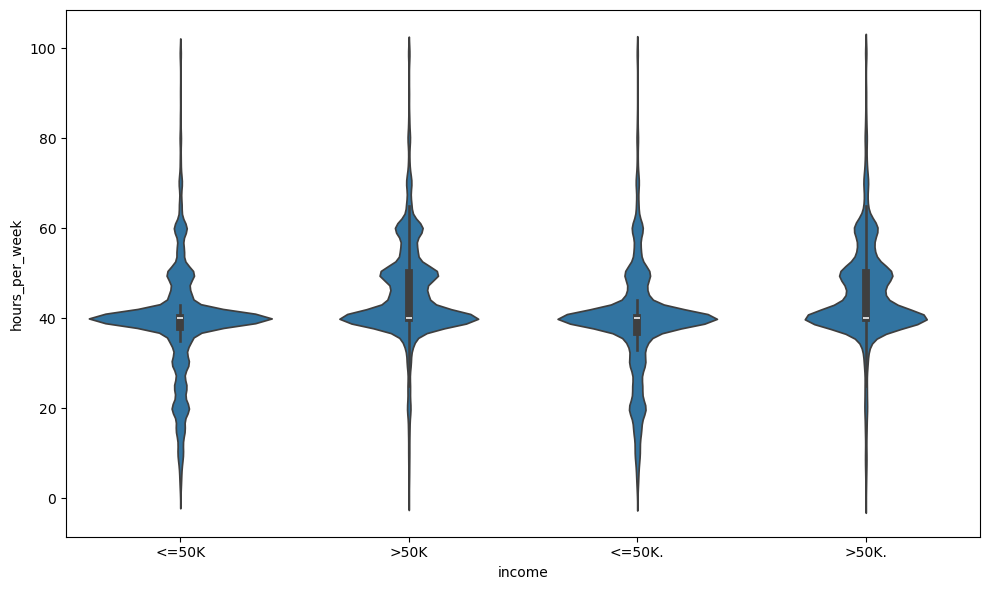

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='hours_per_week', hue='income', kde=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='income', y='hours_per_week', data=df)
plt.tight_layout()
plt.show()

# Results and Analysis of Hypothesis Test 1


**People who work more hours per week are more likely to earn more than $50K.**


### Analysis

This hypothesis investigates whether the number of hours a person works per week affects their income category. We approached this by visually and numerically comparing the `hours_per_week` feature across the two income groups (`<=50K` and `>50K`).

We first plotted histograms and violin plots of hours worked per week, separated by income group. The patterns revealed several important insights:

- People earning `>50K` tend to work more hours per week than those earning `<=50K`.
- The distribution of `>50K` earners is skewed toward longer working hours, often exceeding 45–50 hours per week.
- People earning `<=50K` tend to be clustered around the standard 40-hour workweek, with a sharp drop-off above 45 hours.

This means that although many people in both groups work full-time, **those who earn more than $50K are more likely to put in extended work hours** beyond the full-time baseline.

To explore this further, we compared the **average** hours worked per week:

- The average for the `>50K` group is higher than the average for the `<=50K` group.
- We also observed a larger spread in the `>50K` group—some individuals work up to 60, 70, or even 80 hours per week.

This observation makes sense in many real-world scenarios:
- **High-income roles** often demand longer hours, such as in tech, law, finance, medicine, or executive positions.
- **Salaried roles** tend to expect more commitment and time flexibility, without necessarily offering hourly compensation limits.
- **Lower-income roles** are more likely to be hourly, part-time, or capped by labor regulations, which limits the ability to increase earnings by working more.

It’s also worth noting that working more hours doesn’t always guarantee a higher income. There are people in the `<=50K` group working long hours too, often across multiple part-time jobs. However, **the overall trend** remains: **longer working hours are more common among high-income individuals in this dataset**.

This pattern is strong enough to suggest that working more hours increases the likelihood of earning more than $50K—not necessarily because of the hours alone, but because of the types of jobs that require or allow for more hours.

---

### Conclusion

The dataset supports the hypothesis:  
**People who work more hours per week are more likely to earn more than $50K.**

While not all high earners work long hours and not all long-hour workers earn high incomes, the general trend holds across the dataset. Income level is associated with work hours, and high-income earners are more likely to exceed the standard 40-hour workweek.


##### **Both hypotheses are supported by the data. Education and work hours are meaningful predictors of income level in this dataset.**